In [1]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests
import zipfile

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


In [17]:
all_data_df = pd.read_csv('no_0_solar_with_interpolation.csv')

In [18]:
all_data_df.columns

Index(['Unnamed: 0', 'Date', 'hhmm', 'DHI', 'DNI', 'GHI', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo', 'Wind Speed',
       'Precipitable Water', 'Wind Direction', 'Relative Humidity',
       'Temperature', 'Pressure', 'Solar', 'Normalized_Solar_lin',
       'Normalized_Solar_geom', 'Normalized_Solar'],
      dtype='object')

In [19]:
all_data_df.head()

,Unnamed: 0,Date,hhmm,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar
0,16,01/01/2013,08:00,13,0,13,50,204,77,4,...,2.9,3.814,355.2,96.35,11.0,1010.0,0.000080,9.756098e-07,9.756098e-07,6.611570e-07
1,17,01/01/2013,08:30,65,0,65,81,356,160,8,...,3.0,3.741,355.2,96.38,11.0,1010.0,0.184486,2.249829e-03,2.249829e-03,1.524678e-03
2,18,01/01/2013,09:00,10,0,10,99,487,248,7,...,3.3,3.669,1.7,96.05,11.0,1010.0,0.472936,5.767512e-03,5.767512e-03,3.908562e-03
3,19,01/01/2013,09:30,14,0,14,114,566,331,8,...,3.3,3.601,1.7,96.08,11.0,1010.0,0.919004,1.120737e-02,1.120737e-02,7.595074e-03
4,20,01/01/2013,10:00,31,0,31,119,643,409,4,...,3.4,3.534,5.4,89.10,12.0,1010.0,1.363654,1.662993e-02,1.662993e-02,1.126987e-02


In [20]:
for label in ['Unnamed: 0', 'Date', 'hhmm','Installed', 'Fill Flag']:
    if label in all_data_df.columns:
        all_data_df.drop(label,axis=1,inplace=True)

In [21]:
all_data_df.head()

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar
0,13,0,13,50,204,77,4,10.0,82.67,0.143,2.9,3.814,355.2,96.35,11.0,1010.0,0.000080,9.756098e-07,9.756098e-07,6.611570e-07
1,65,0,65,81,356,160,8,10.0,77.27,0.143,3.0,3.741,355.2,96.38,11.0,1010.0,0.184486,2.249829e-03,2.249829e-03,1.524678e-03
2,10,0,10,99,487,248,7,10.0,72.18,0.143,3.3,3.669,1.7,96.05,11.0,1010.0,0.472936,5.767512e-03,5.767512e-03,3.908562e-03
3,14,0,14,114,566,331,8,10.0,67.46,0.143,3.3,3.601,1.7,96.08,11.0,1010.0,0.919004,1.120737e-02,1.120737e-02,7.595074e-03
4,31,0,31,119,643,409,4,10.0,63.22,0.143,3.4,3.534,5.4,89.10,12.0,1010.0,1.363654,1.662993e-02,1.662993e-02,1.126987e-02


In [22]:
all_data_df.columns

Index(['DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Solar',
       'Normalized_Solar_lin', 'Normalized_Solar_geom', 'Normalized_Solar'],
      dtype='object')

In [9]:
rows,columns=all_data_df.shape

In [64]:
max_in_days=np.zeros((rows,1))
for i in range(rows):
    if i < 2000:
        solar_days = max(all_data_df.Solar[:2000])
    elif i < (rows-1000):
        solar_days = max(all_data_df.Solar[i-1000:i+1000])
    else:
        solar_60_days = max(all_data_df.Solar[-2000:])
    max_in_days[i] =solar_days

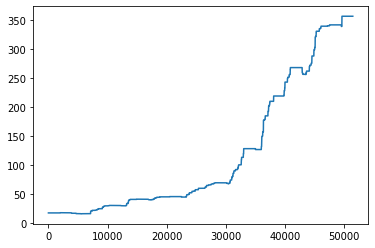

In [65]:
plt.plot(max_in_days)

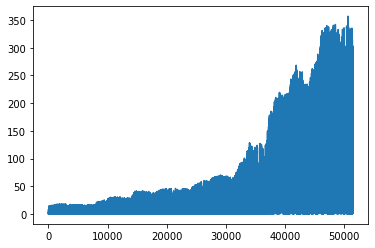

In [66]:
plt.plot(all_data_df.Solar)

In [67]:
normalized_solar=np.array(all_data_df.Solar).reshape(-1,1)/max_in_days

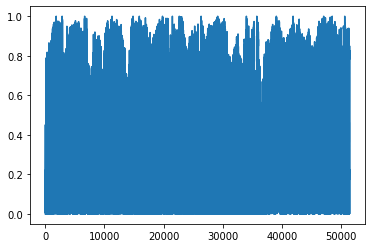

In [68]:
plt.plot(normalized_solar)

In [69]:
all_data_df=all_data_df.assign(normalized_solar=normalized_solar)

/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


With top 11 features, R-squared of testing data is: 0.567
R-squared of training data is: 0.605


(-0.3010750344229485,
 1.2261856341479875,
 -0.05675140657767147,
 1.0567514093797523)

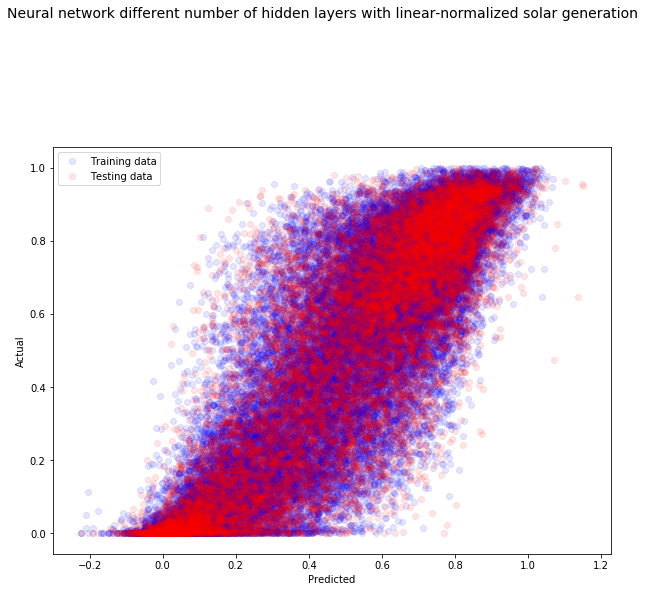

In [72]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
train,test=train_test_split(all_data_df,test_size=0.3,random_state=100)
prediction = 'normalized_solar'

feature_list = ranked_list[:11]

scaler = preprocessing.StandardScaler()

X_train = np.array(train[feature_list])
y_train = np.array(train[prediction])
X_test = np.array(test[feature_list])
y_test = np.array(test[prediction])
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.fit_transform(X_test)
clf = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(50,50,50))
clf.fit(X_train_standardized,y_train)

fig, axs = plt.subplots(1, 1, figsize=(10,10))

fig.suptitle('Neural network different number of hidden layers with linear-normalized solar generation', fontsize=14)

axs.scatter(clf.predict(X_train_standardized), y_train, alpha = 0.1, color='blue')
axs.scatter(clf.predict(X_test_standardized), y_test, alpha = 0.1, color='red')
axs.set_xlabel('Predicted')
axs.set_ylabel('Actual')
axs.legend(('Training data', 'Testing data'))
print('With top '+str(11)+' features, R-squared of testing data is: '+"{:.3f}".format(r2_score(clf.predict(X_test_standardized),y_test)))
print('R-squared of training data is: '+"{:.3f}".format(r2_score(clf.predict(X_train_standardized),y_train)))
plt.axis('scaled')
